<h1> <center>Effect of Weather on Covid-19 Transmission

<h2> OBJECTIVE

> <div class="alert alert-block alert-info">To determine the potential weather's variable which may be responsible for the transmission of Covid - 19.

<H3> DATA AVAILABILITY

The data for this project has been extracted from following source:

<H3> OUTPUT

output will display here.....

## Importing Libraries

In [2]:
# Linear algebra
import numpy as np 

# Data processing
import pandas as pd 

# Data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# plotly for visualisation
import plotly.express as plot_ex


# Parameters
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = False

# datetime
import datetime

# Importing required library to split the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Machine Learning models & Performance evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from statsmodels.tsa.arima_model import ARIMA
import itertools

# Warnings
import warnings
warnings.filterwarnings('ignore')


### Importing the dataset

In [2]:
df_london=pd.read_csv("history_dataLondon.csv")
df_GLA=pd.read_csv("history_dataGLA.csv")

In [3]:
df_weather_london=pd.read_csv("history_weather_dataLondon.csv")
df_weather_GLA=pd.read_csv("history_weather_dataGLA.csv")

<h2> DATA AUDIT

In [4]:
# Information about data i.e. Data type, No. of records, No. of Variables
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       382 non-null    object 
 1   Date time  382 non-null    object 
 2   newCases   382 non-null    int64  
 3   newDeaths  382 non-null    int64  
 4   cumCases   336 non-null    float64
 5   cumDeaths  214 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 18.0+ KB


From the above obseervation it is found that there are some missing values in CumCases and CumDeaths

In [6]:
# Information about data i.e. Data type, No. of records, No. of Variables
df_GLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       382 non-null    object 
 1   Date time  382 non-null    object 
 2   newCases   382 non-null    int64  
 3   newDeaths  382 non-null    int64  
 4   cumCases   232 non-null    float64
 5   cumDeaths  232 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 18.0+ KB


From the above obseervation it is found that there are some missing values in CumCases and CumDeaths

In [ ]:
# Information about data i.e. Data type, No. of records, No. of Variables
df_weather_london.info()

It is found "Heat Index" has only 1 record, "Date time" is in object DataType and "Wind Gust" & "Wind Chill" has some missing values

In [ ]:
# Information about data i.e. Data type, No. of records, No. of Variables
df_weather_GLA.info()

It is found "Heat Index" has only 1 record, "Date time" is in object DataType and "Wind Gust" & "Wind Chill" has some missing values

## Missing value treatment

In [9]:
# Filling the missing values with 0
df_london.fillna(0,inplace=True)
df_GLA.fillna(0,inplace=True)

In [10]:
# For weather data removing the feilds with high no. of missing values
df_weather_london.drop(["Heat Index","Wind Chill","Wind Gust"],axis=1,inplace=True)
df_weather_GLA.drop(["Heat Index","Wind Chill","Wind Gust"],axis=1,inplace=True)

In [11]:
print("Missing value in df_london : " ,df_london.isnull().sum().sum())
print("Missing value in df_GLA : " ,df_GLA.isnull().sum().sum())
print("Missing value in df_weather_london : " ,df_weather_london.isnull().sum().sum())
print("Missing value in df_weather_GLA : " ,df_weather_GLA.isnull().sum().sum())

Missing value in df_london :  0
Missing value in df_GLA :  0
Missing value in df_weather_london :  0
Missing value in df_weather_GLA :  0


## Merging the data

For the analysis I considered that if a case is reported today it means that person infected in-between 2 - 14 days so that weather condition of 2-14 days ago will matter. So for this alanlysis I took mean of 2-14 days i.e. 8. It means if a person reported positive today then weather condition of 8 days ago will be responsible for that.

In [12]:
# Converting 'Date time' variable into datetime datatype 
df_london['Date time']= pd.to_datetime(df_london['Date time'])
df_GLA['Date time']= pd.to_datetime(df_GLA['Date time'])
df_weather_london['Date time']= pd.to_datetime(df_weather_london['Date time'])
df_weather_GLA['Date time']= pd.to_datetime(df_weather_GLA['Date time'])


In [13]:
# add a column in covid data i.e. 'Infection Day' (day, which is responsible for today's covid-19 positive person)
df_london['Infection Day']=df_london['Date time'] -  pd.to_timedelta(8,'d')
df_GLA['Infection Day']=df_GLA['Date time'] -  pd.to_timedelta(8,'d')


In [14]:
#appending the dataFrame of London & Glasgow (For Covid and Weather)
df_covid=df_london.append(df_GLA)
df_weather=df_weather_london.append(df_weather_GLA)


In [15]:
# Complete weather data information after merging data of London weather and Glasgow weather
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 0 to 381
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   City                 764 non-null    object        
 1   Date time            764 non-null    datetime64[ns]
 2   Maximum Temperature  764 non-null    float64       
 3   Minimum Temperature  764 non-null    float64       
 4   Temperature          764 non-null    float64       
 5   Precipitation        764 non-null    float64       
 6   Snow                 764 non-null    int64         
 7   Snow Depth           764 non-null    int64         
 8   Wind Speed           764 non-null    float64       
 9   Wind Direction       764 non-null    float64       
 10  Visibility           764 non-null    float64       
 11  Cloud Cover          764 non-null    float64       
 12  Relative Humidity    764 non-null    float64       
 13  Conditions           764 non-null  

Till now weather data has 13 columns and 764 record 

In [16]:
#Joining the weather data with covid-19 data 
# Left Join for two data-frames on following fields i.e.'Infection Day','City' 
df=pd.merge(df_covid, df_weather, how='left',left_on=['Infection Day','City'],right_on=['Date time','City'])


In [17]:
# First five rows of the dataset
df.head()

,City,Date time_x,newCases,newDeaths,cumCases,cumDeaths,Infection Day,Date time_y,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Conditions
0,London,2020-03-01,0,0,0.0,0.0,2020-02-22,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,London,2020-03-02,0,0,0.0,0.0,2020-02-23,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,London,2020-03-03,0,0,0.0,0.0,2020-02-24,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,London,2020-03-04,0,0,0.0,0.0,2020-02-25,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,London,2020-03-05,0,0,0.0,0.0,2020-02-26,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As per our assumption that weather of 8 days ago will matter for today's case, So while joining the tables we don't have the weather data before 2020-03-01 that's why we got 8+8 ( 8 for london, 8 for Glasgow) records with null values. Like if a case is  reported on 2020-03-09 then weather of 2020-03-01 will be responsible for that case, but if a case is reported on 2020-03-01 then weather of 2020-02-21 will matter but we don't have that data in our dataset.
We will remove these values. 

In [18]:
#Droping the rows which have missing values
df.dropna(axis=0,inplace =True)
# resetting the index 
df.reset_index(drop=True,inplace = True)

In [19]:
# Checking if still there any missing value in the dataset
df.isnull().sum().sum()

0

In [20]:
# Getting the value counts(i.e. frequency of unique records in Conditions variable)
df.Conditions.value_counts()

Rain                      236
Rain, Partially cloudy    186
Clear                     178
Rain, Overcast             93
Partially cloudy           47
Overcast                    8
Name: Conditions, dtype: int64

In [21]:
# Label Encoding to transform categorical value into Numerical value
# 0 as Clear                     178
# 1 as Overcast                    8
# 2 as Partially cloudy           47
# 3 as Rain                      236
# 4 as Rain, Overcast             93
# 5 as Rain, Partially cloudy    186

# creating instance of labelencoder
l_encoder = LabelEncoder()
# Apply label encoder to transform values in numeric form
df["Conditions"] = l_encoder.fit_transform(df["Conditions"])

In [22]:
# Getting full insights of data, including count,mean, std etc.
df.describe()

,newCases,newDeaths,cumCases,cumDeaths,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Conditions
count,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.0,748.0,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000
mean,965.236631,13.298128,86467.074866,2769.971925,13.942112,6.997193,10.484492,4.026885,0.0,0.0,14.672594,184.899345,9.153209,29.890508,77.963810,2.823529
std,2487.865404,36.911496,185377.064132,4360.005128,6.518100,5.297923,5.588430,8.045956,0.0,0.0,5.516172,70.748579,2.355188,33.279205,11.815821,1.827466
min,0.000000,0.000000,0.000000,0.000000,-0.200000,-10.700000,-4.700000,0.000000,0.0,0.0,0.300000,20.710000,0.900000,0.000000,46.970000,0.000000
25%,0.000000,0.000000,2564.000000,0.000000,9.675000,3.100000,6.800000,0.000000,0.0,0.0,10.600000,127.675000,7.700000,0.900000,69.547500,2.000000
50%,117.500000,0.000000,15020.500000,390.500000,13.700000,7.200000,10.400000,0.760000,0.0,0.0,14.100000,203.520000,9.200000,4.800000,81.090000,3.000000
75%,378.750000,7.000000,36232.000000,6177.250000,18.100000,11.000000,14.425000,4.622500,0.0,0.0,17.800000,239.872500,10.800000,60.925000,87.117500,4.000000
max,17111.000000,272.000000,685563.000000,15359.000000,36.100000,22.100000,27.500000,80.370000,0.0,0.0,36.000000,331.040000,14.900000,99.400000,98.720000,5.000000


from the above table it is clear that "snow" and "Snow Depth" has nothing in dataset, it is only zero. So, there is no importance of these fields in our analysis


In [23]:
# Removing Snow and Snow Depth
df.drop((["Snow","Snow Depth"]), axis=1, inplace =True)

### Bi-Variate Analysis (Temperature v/s newCases for London)

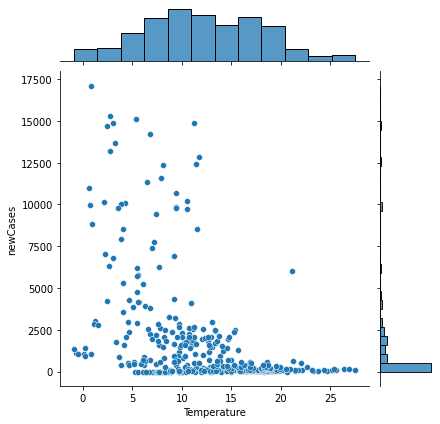

In [24]:
# Bi-Variate Analysis (Temperature v/s newCases for London)
sns.jointplot(df.Temperature[df.City=="London"],df.newCases[df.City=="London"] )

From the above analysis it seems like there is no relation between temperature and cases in London as it is distributed at all temperature range

### Bi-Variate Analysis (Temperature v/s newCases for Glasgow)

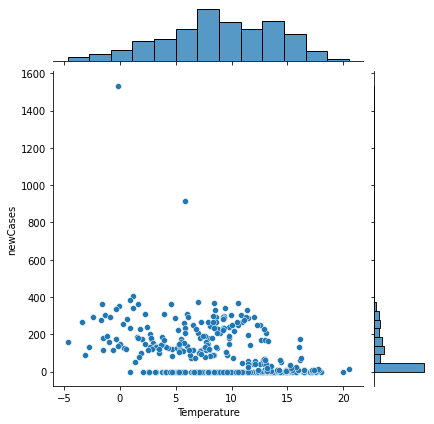

In [25]:
# Bi-Variate Analysis (Temperature v/s newCases for Glasgow)
sns.jointplot(df.Temperature[df.City=="Glasgow"],df.newCases[df.City=="Glasgow"] )

From the above analysis it seems like there is no relation between temperature and cases in Glasgow as it is distributed at all temperature range

### Multi-Variate Analysis

### Correlation matrix heatmap
A correlation matrix is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table.

### For London

In [28]:
#Preparring dataset for correlation metrix using heatmap
df_London_corr=df[df.City=="London" ].drop(["cumCases","cumDeaths","Date time_y"], axis =1)
df_GLS_corr=df[df.City=="Glasgow" ].drop(["cumCases","cumDeaths","Date time_y"], axis =1)


In [29]:
# Relation Between Variables(For London Only)
mask = np.zeros_like(df_London_corr.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
plt.figure(figsize=(140,140))
sns.heatmap(df_London_corr.corr(), mask=mask, annot=True, annot_kws={"size": 80})
sns.set_style('white')
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.show()

From the above correlation heatmap, It is clear the association of newCase with Cloud cover and precipitation is very low.it means these variales has no/very less linkage with newCases

### For Glasgow

In [30]:
# Relation Between Variables(For Glasgow Only)
mask = np.zeros_like(df_GLS_corr.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
plt.figure(figsize=(140,140))
sns.heatmap(df_GLS_corr.corr(), mask=mask, annot=True, annot_kws={"size": 80})
sns.set_style('white')
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.show()

From the above correlation heatmap, It is clear the association of newCase with Cloud cover and wind direction is very low.it means these variales has no/very less linkage with newCases

### Data Visualiztion

In [31]:
# PLot the Temperature by day
plot_ex.line(df, x='Infection Day', y='Temperature', color='City',title='  Average Temperature V/S Infection Days')

From the above observation it is clear the variation in temperature for both the cities is almost following the same trend

In [32]:
# PLot the Humadity V/S Infection day
plot_ex.line(df, x='Infection Day', y='Relative Humidity', color='City', title='  Humidity V/S Infection Days')

From the above observation it is clear the variation in Relative Humidity for both the cities is almost following the same trend

In [33]:
#New cases V/S Date time_x
plot_ex.line(df, x='Date time_x', y='newCases', color='City', title='New Cases V/S Days')

From the above visualization it seems like there is a sudden rise in cases in between October 2020 to March 2021 in London as compare to Glasgow

### Feature Selection

## Variable Inflation factor
Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. This ratio is calculated for each independent variable. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.

In [36]:
#Feature selection using Variable Inflation factor for both the country
#Filtering variables 
variables_London = df_London_corr.drop(['newCases','Date time_x','Infection Day','City','newDeaths'],axis=1)
variables_GLS = df_GLS_corr.drop(['newCases','Date time_x','Infection Day','City','newDeaths'],axis=1)

# creating dataframe for VIF (London)
vif_london = pd.DataFrame()
vif_london["features"] = variables_London.columns
vif_london["VIF_London"] = [variance_inflation_factor(variables_London.values, i) for i in range(variables_London.shape[1])]
vif_london
# creating dataframe for VIF (Glasgow)
vif_GLS = pd.DataFrame()
vif_GLS["VIF_GLS"] = [variance_inflation_factor(variables_GLS.values, i) for i in range(variables_GLS.shape[1])]
vif_GLS
# Concating the VIF of London and Glasgow
pd.concat([vif_london, vif_GLS], axis=1)


,features,VIF_London,VIF_GLS
0,Maximum Temperature,390.284534,257.578859
1,Minimum Temperature,113.593450,52.966356
2,Temperature,818.046940,444.947142
3,Precipitation,1.666517,1.574125
4,Wind Speed,10.725539,8.060828
5,Wind Direction,10.026711,10.035701
6,Visibility,22.549396,16.437164
7,Cloud Cover,1.126526,18.730918
8,Relative Humidity,16.763230,54.242526
9,Conditions,4.564115,10.325773


##### Lower the VIF, It means the variable is more significat/relative.
From the above analysis it is found there is more impact on transmission of covid with Relative Humadity & Visibility as compare to Temperature

## Variable selection using OLS method


In [37]:
# To  check for the dependent and independent varible significance we will use OLS method for London
# seperating out dependent and independent variable
x1 = df_London_corr.drop(['newCases','Date time_x','Infection Day','City'],axis=1)
y1 = df_London_corr['newCases']
# spliliting the data into test and train
train_x,test_x,train_y,test_y=train_test_split(x1, y1,test_size=0.2, random_state=15)
# Appliying the model
train_x = sm.add_constant(train_x)
test_x = sm.add_constant(test_x)
smlr = sm.OLS(train_y, train_x).fit()
#Summary of model
smlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               newCases   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     40.31
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           6.92e-52
Time:                        08:58:09   Log-Likelihood:                -2722.2
No. Observations:                 299   AIC:                             5468.
Df Residuals:                     287   BIC:                             5513.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -7727.7431   2146.144     -3.601      0.000    -1.2e+04   -3503.564
newDeaths              45.4918      3.384     13.443      0.000      38.831      52.153
Maximum Temperature    23.2685    153.408      0.152      0.880    -278.679     325.216
Minimum Temperature  -199.9714    139.774     -1.431      0.154    -475.084      75.141
Temperature           122.0337    274.821      0.444      0.657    -418.888     662.955
Precipitation         -45.4155     30.795     -1.475      0.141    -106.029      15.198
Wind Speed             29.2060     31.902      0.915      0.361     -33.586      91.998
Wind Direction          0.1248      2.043      0.061      0.951      -3.897       4.146
Visibility            177.6450     83.606      2.125      0.034      13.086     342.204
Cloud Cover           -15.7447     19.216     -0.819      0.413     -53.567      22.078
Relative Humidity      89.9542     20.788      4.327      0.000      49.039     130.870
Conditions            -29.2500    120.083     -0.244      0.808    -265.605     207.105
==============================================================================
Omnibus:                      111.859   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              476.348
Skew:                           1.535   Prob(JB):                    3.65e-104
Kurtosis:                       8.368   Cond. No.                     3.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

the model has significant difference in between R and Adjusted R square. It means there is some insignificatnt variables in data. let's remove that on the basis of p-Value

In [38]:
# Creating a dataframe with feilds and their P-Value for shorting out the feature
pd.DataFrame({'coef': smlr.params, 'p-value': round(smlr.pvalues,3)})

,coef,p-value
const,-7727.743070,0.000
newDeaths,45.491823,0.000
Maximum Temperature,23.268540,0.880
Minimum Temperature,-199.971356,0.154
Temperature,122.033679,0.657
Precipitation,-45.415535,0.141
Wind Speed,29.206023,0.361
Wind Direction,0.124762,0.951
Visibility,177.645038,0.034
Cloud Cover,-15.744692,0.413


'Wind Direction','Maximum Temperature','Conditions', these variables has high p-value. we have to remove these to improve the efficiency of model

In [39]:
# removing the variables with high p-value and then apply again the ols model to check the significance of remaining variables
df_London_corr_2=df_London_corr.drop(['Wind Direction','Maximum Temperature','Conditions'],axis=1)
x2 = df_London_corr_2.drop(['newCases','Date time_x','Infection Day','City'],axis=1)
y2 = df_London_corr_2['newCases']
train_x,test_x,train_y,test_y=train_test_split(x2,y2,test_size=0.2,random_state=15) 
train_x = sm.add_constant(train_x)
test_x = sm.add_constant(test_x)
smlr2 = sm.OLS(train_y, train_x).fit()

smlr2.summary()                                              


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               newCases   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     55.98
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           1.88e-54
Time:                        08:58:09   Log-Likelihood:                -2722.2
No. Observations:                 299   AIC:                             5462.
Df Residuals:                     290   BIC:                             5496.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -7511.3790   1923.441     -3.905      0.000   -1.13e+04   -3725.706
newDeaths              45.4907      3.310     13.742      0.000      38.976      52.006
Minimum Temperature  -217.8257    100.519     -2.167      0.031    -415.664     -19.987
Temperature           164.1452     95.486      1.719      0.087     -23.787     352.078
Precipitation         -47.3406     29.945     -1.581      0.115    -106.279      11.597
Wind Speed             27.6500     31.162      0.887      0.376     -33.682      88.982
Visibility            174.6100     71.615      2.438      0.015      33.660     315.560
Cloud Cover           -16.1327     19.027     -0.848      0.397     -53.582      21.317
Relative Humidity      87.4681     17.490      5.001      0.000      53.045     121.891
==============================================================================
Omnibus:                      111.311   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.023
Skew:                           1.526   Prob(JB):                    1.17e-103
Kurtosis:                       8.360   Cond. No.                     1.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# Creating a dataframe with feilds and their P-Value for shorting out the feature
pd.DataFrame({'coef': smlr2.params, 'p-value': round(smlr2.pvalues, 3)})

,coef,p-value
const,-7511.379045,0.000
newDeaths,45.490657,0.000
Minimum Temperature,-217.825697,0.031
Temperature,164.145240,0.087
Precipitation,-47.340638,0.115
Wind Speed,27.650045,0.376
Visibility,174.609962,0.015
Cloud Cover,-16.132710,0.397
Relative Humidity,87.468081,0.000


'Cloud Cover' and 'Wind Speed' has high p-value. Removing these fields will help to improve the accuracy of model

In [41]:
# removing the variables with high p-value and then apply again the ols model to check the significance of remaining variables
df_London_corr_3=df_London_corr_2.drop(['Cloud Cover','Wind Speed'],axis=1)
x3 = df_London_corr_3.drop(['newCases','Date time_x','Infection Day','City'],axis=1)
y3 = df_London_corr_3['newCases']
train_x,test_x,train_y,test_y=train_test_split(x3,y3,test_size=0.2,random_state=15)
train_x = sm.add_constant(train_x)
test_x = sm.add_constant(test_x)
smlr3 = sm.OLS(train_y, train_x).fit()

smlr3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               newCases   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     74.57
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           4.91e-56
Time:                        08:58:09   Log-Likelihood:                -2722.9
No. Observations:                 299   AIC:                             5460.
Df Residuals:                     292   BIC:                             5486.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -7298.8471   1764.594     -4.136      0.000   -1.08e+04   -3825.912
newDeaths              45.4800      3.301     13.776      0.000      38.982      51.978
Minimum Temperature  -211.6168     96.669     -2.189      0.029    -401.873     -21.361
Temperature           161.2157     90.583      1.780      0.076     -17.062     339.494
Precipitation         -42.8935     29.477     -1.455      0.147    -100.907      15.120
Visibility            190.8249     70.181      2.719      0.007      52.699     328.951
Relative Humidity      86.9092     16.913      5.139      0.000      53.622     120.197
==============================================================================
Omnibus:                      114.310   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              489.203
Skew:                           1.572   Prob(JB):                    5.90e-107
Kurtosis:                       8.421   Cond. No.                     1.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# Creating a dataframe with feilds and their P-Value for shorting out the feature
pd.DataFrame({'coef': smlr3.params, 'p-value': round(smlr3.pvalues, 3)})

,coef,p-value
const,-7298.847081,0.000
newDeaths,45.480046,0.000
Minimum Temperature,-211.616768,0.029
Temperature,161.215727,0.076
Precipitation,-42.893543,0.147
Visibility,190.824855,0.007
Relative Humidity,86.909208,0.000


'Precipitation' has high p-value. Removing this will help to improve the accuracy of model

In [43]:
# removing the variables with high p-value and then apply again the ols model to check the significance of remaining variables
df_London_corr_4=df_London_corr_3.drop(['Precipitation'],axis=1)
x4 = df_London_corr_4.drop(['newCases','Date time_x','Infection Day','City','Temperature','Minimum Temperature'],axis=1)
y4 = df_London_corr_4['newCases']
train_x,test_x,train_y,test_y=train_test_split(x4,y4,test_size=0.2,random_state=15)
train_x = sm.add_constant(train_x)
test_x = sm.add_constant(test_x)
smlr4 = sm.OLS(train_y, train_x).fit()

smlr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               newCases   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     143.2
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           2.85e-57
Time:                        08:58:09   Log-Likelihood:                -2727.5
No. Observations:                 299   AIC:                             5463.
Df Residuals:                     295   BIC:                             5478.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5193.3113   1396.655     -3.718      0.000   -7941.981   -2444.642
newDeaths            48.1529      3.050     15.789      0.000      42.151      54.155
Visibility          150.7730     68.635      2.197      0.029      15.697     285.849
Relative Humidity    62.7828     13.482      4.657      0.000      36.249      89.317
==============================================================================
Omnibus:                      121.619   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.342
Skew:                           1.649   Prob(JB):                    8.60e-125
Kurtosis:                       8.915   Cond. No.                         888.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Creating a dataframe with feilds and their P-Value for shorting out the feature
pd.DataFrame({'coef': smlr4.params, 'p-value': round(smlr4.pvalues, 3)})

,coef,p-value
const,-5193.311272,0.000
newDeaths,48.152877,0.000
Visibility,150.772974,0.029
Relative Humidity,62.782835,0.000


from the above observation it is found that most significant variable for new cases are Visibility and Relative Humadity
#### Notes:
> Parameters estimated are considered to be significant if p-value is less than 0.05 <br>

### Apply Random Forest model

In [1]:
# Selecting X and Y
x1 = df.drop(['newCases','Date time_x','Date time_y','Infection Day','City'],axis=1)
y1 = df['newCases']

# spliting between train and test
train_x,test_x,train_y,test_y=train_test_split(x1, y1,test_size=0.2, random_state=15)

# Apply model
model = RandomForestRegressor(random_state=15, n_estimators=50,max_depth=5,n_jobs = 5)
model.fit(train_x, train_y)


NameError: name 'df' is not defined

In [47]:
# checking model score
model.score(test_x,test_y)

0.9516713118073934

the model accuracy is high it means model is performing well. Let's fine tune the model to further improve its accuracy

In [48]:
# Grid search for fine tuning the model parameters
pargrid_rf = {'n_estimators': [10,20,30,40,50,60,70, 80, 90, 100],
                  'max_features': [ 3,4,5,6,7, 8,9,10,11,12],
             'max_depth': [5,10,15,20,25,30]
             }

gscv_rf = GridSearchCV(estimator = RandomForestRegressor(), 
                        param_grid = pargrid_rf, 
                        cv = 5,
                        verbose = True, 
                        n_jobs = -1)

gscv_results = gscv_rf.fit(train_x, train_y)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1168 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1618 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2168 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 2818 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  6.2min finished


In [49]:
# getting best parameter for model
gscv_results.best_params_

{'max_depth': 25, 'max_features': 7, 'n_estimators': 30}

In [90]:
# Again apply model for these optimum parameters
model = RandomForestRegressor(random_state=15, n_estimators=30,max_depth=25,max_features= 7)
model.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features=7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=15, verbose=0, warm_start=False)

In [72]:
# Model score
model.score(test_x,test_y)

0.9647930123034263

In [91]:
# predicting Y for the test data (y_predicted_test)
y_test_predict = model.predict(test_x)

In [95]:
# # comparing various evaluation meterics for this model
print('The MSE of Random forest is:',metrics.mean_squared_error(test_y,y_test_predict,squared=False))
print('The MAE of Random forest is:',metrics.mean_absolute_error(test_y,y_test_predict))
#print('The MAPE of Random forest is:', np.mean(np.abs(test_y - y_test_predict)/test_y)*100)


The MSE of Random forest is: 510.66574105660237
The MAE of Random forest is: 184.99977777777775
The MAPE of Random forest is: inf


### ARIMA model

In [58]:
# Seperating out the data for training and validation
X_train = df_London_corr[df_London_corr['Date time_x'] < '2021-02-15']
X_valid = df_London_corr[df_London_corr['Date time_x'] >= '2021-01-15']

print('X_train Shape', X_train.shape)
print('X_Valid Shape', X_valid.shape)


X_train Shape (343, 15)
X_Valid Shape (62, 15)


In [59]:
# filtering the train data
London_train = X_train[X_train['City'] == 'London']
London_train_2 = London_train[['Date time_x', 'newCases']]

#filtering the test data
London_valid = X_valid[X_valid['City'] == 'London']
London_valid_2 = London_valid[['Date time_x', 'newCases']]

# set the date into index
London_train_2.set_index('Date time_x', inplace=True)
London_valid_2.set_index('Date time_x', inplace=True)

# # Setting the Index Validation
index=London_valid_2.index

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



The MSE of ARIMA is: 3456.4210150204412
The MAE of ARIMA is: 2574.6608410340045
The MAPE of ARIMA is: 120.25333872945238


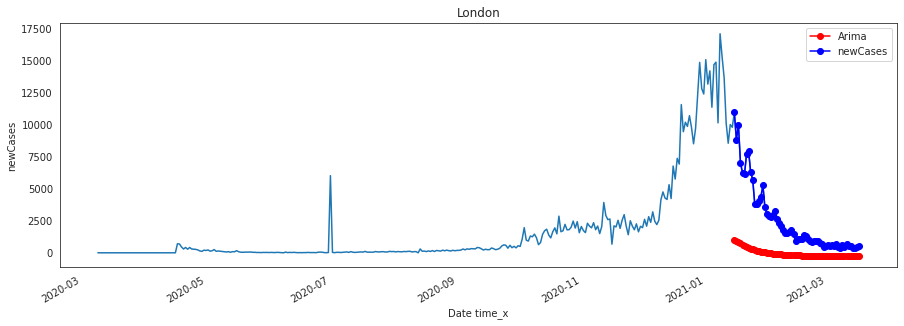

In [87]:
# Running ARIMA model
model_arima = ARIMA(London_train_2, order=(2,0,0)) # start 2-0-0 and move to the best
model_arima_fit = model_arima.fit(disp=-1)

# Saving ARIMA predictions
fcast1 = model_arima_fit.forecast(62)[0]

# # Passing the same index as the others----, index=index_7_years
fcast1 = pd.Series(fcast1,index=index)
fcast1 = fcast1.rename("Arima") 

# Ploting the predictions
fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='Date time_x', y='newCases', data = London_train)
chart.set_title('London')
fcast1.plot(ax=ax, color='red', marker="o", legend=True)
London_valid_2.plot(ax=ax, color='blue', marker="o", legend=True)

# Printing the MSE
print('The MSE of ARIMA is:', mean_squared_error(London_valid['newCases'].values, fcast1.values, squared=False))
print('The MAE of ARIMA is:', mean_absolute_error(London_valid['newCases'].values, fcast1.values))
print('The MAPE of ARIMA is:', np.mean(np.abs((London_valid['newCases'].values - fcast1.values)/London_valid['newCases'].values))*100


In [ ]:
#finding the best parameter for ARIMA
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))

for param in pdq:
    try:
        model_arima = ARIMA(London_train_2,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
# The Akaike information criterion (AIC) is an estimator of in-sample prediction error and thereby relative quality of
# statistical models for a given set of data

It's like the mean squared error in Regression - The smaller the number, better will be the Model

In [ ]:
# Running ARIMA model again on updated parameters
model_arima = ARIMA(London_train_2, order=(0,1,4)) 
model_arima_fit = model_arima.fit(disp=-1)

# Saving ARIMA predictions
fcast1 = model_arima_fit.forecast(62)[0]

# # Passing the same index as the others----, index=index_7_years
fcast1 = pd.Series(fcast1,index=index)
fcast1 = fcast1.rename("Arima") 

# Ploting the predictions
fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='Date time_x', y='newCases', data = London_train)
chart.set_title('London')
fcast1.plot(ax=ax, color='red', marker="o", legend=True)
London_valid_2.plot(ax=ax, color='blue', marker="o", legend=True)

# Printing the MSE
print('The MSE of ARIMA is:', mean_squared_error(London_valid['newCases'].values, fcast1.values, squared=False))
print('The MAE of ARIMA is:', mean_absolute_error(London_valid['newCases'].values, fcast1.values))
print('The MAPE of ARIMA is:', np.mean(np.abs((London_valid['newCases'].values - fcast1.values)/London_valid['newCases'].values))*100


### Linear Regression Model

In [ ]:
# Sorting data for test and vaidation for linear regression model
X_train_reg=X_train.drop(['City','Infection Day','newCases'],axis=1)
Y_train_reg=X_train[["newCases",'Date time_x']]
X_valid_reg=X_valid.drop(['City','Infection Day','newCases'],axis=1)
Y_valid_reg=X_valid[["newCases",'Date time_x']]
# set the index
X_train_reg.set_index('Date time_x', inplace=True)
Y_train_reg.set_index('Date time_x', inplace=True)
# set the index
X_valid_reg.set_index('Date time_x', inplace=True)
Y_valid_reg.set_index('Date time_x', inplace=True)

In [ ]:
#Linear Regression Model 
reg = linear_model.LinearRegression()
reg.fit(X_train_reg, Y_train_reg)

    # Making predictions
t_fcast4 = reg.predict(X_valid_reg)
t_fcast4=t_fcast4.reshape(62)

    # Passing the same index as the others
t_fcast4 = pd.Series(t_fcast4,index=index)
t_fcast4 = t_fcast4.rename("Regression")
# Regression=t_fcast4

# Ploting the predictions
fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='Date time_x', y='newCases', data = London_train)
chart.set_title('London')
t_fcast4.plot(ax=ax, color='red', marker="o", legend=True)
Y_valid_reg.plot(ax=ax, color='blue', marker="o", legend=True)


# Printing the errors 
print('The MSE of Linear Regression is:', mean_squared_error(Y_valid_reg.values, t_fcast4.values,squared=False))
print('The MAE of Linear Regression is:', mean_absolute_error(Y_valid_reg.values, t_fcast4.values))
print('The MAPE of Linear Regression is:',np.mean(np.abs(Y_valid_reg.values - t_fcast4.values)/Y_valid_reg.values)))


### ANN

In [ ]:
# Selecting X and Y
x1 = df.drop(['newCases','Date time_x','Date time_y','Infection Day'],axis=1)
# encoding the City variable 
x1["City"] = l_encoder.fit_transform(x1["City"])
y1 = df[['newCases']]

# Choosing all rows and colums of x1
X1 = x1.iloc[:,:]
# Choosing only y varibale
y1 = y1.iloc[:,-1]

# creating instance of MinMaxScaler
scaler = MinMaxScaler()
# Fit the scaling to scale down all the X variables 
x_Scaled = scaler.fit_transform(x1)

# spliting between train and test
X_train, X_test, y_train, y_test = train_test_split(x_Scaled, y1, test_size=0.20)



label encoding is being done to convert the variable city from categorical type to numeric type


Scaling (min-max scaling -In this approach, the data is scaled to a fixed range - usually 0 to 1) is being done to scale down the data, so that we will end up with smaller standard deviations, which can suppress the effect of outliers

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

seed = 7
np.random.seed(seed)

# Model
model = Sequential()
model.add(Dense(200, input_dim=36, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_absolute_error', optimizer=keras.optimizers.Adadelta())

#feature_cols = training_set[FEATURES]
#labels = training_set[LABEL].values

model.fit(np.array(X_train), np.array(y_train), epochs=100, batch_size=10)

In [ ]:
# Building the linreg model
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

model = Sequential()

# Input Layer
model.add(Dense(12, input_dim=6, activation='relu'))
# Hidden Layers
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
# Output Layer
model.add(Dense(1, activation='linear'))
model.summary()

In [ ]:
# Compile
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'accuracy'])

In [ ]:
#Apply model
history = model.fit(X_train, y_train, epochs=30, batch_size=50, verbose=1, validation_split=0.2)

In [ ]:
model.score(test_x,test_y)

In [ ]:
# print(x1['City'].value_counts())
# x1["City"] = l_encoder.fit_transform(x1["City"])
# x1["City"].value_counts()